# OpenAI API Labeling for Sequences

In [1]:
import pandas as pd
from sequence_openai_labeling_02 import *
# import turn_signal_preprocessing as prep
from turn_signal_preprocessing import *
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
stats = preprocess_all_images_in_folder(
    input_folder='../seq_img',
    output_folder='../seq_img_enhanced',
    preprocess_mode='yellow',  # or 'enhanced' 'yellow' or 'both'
    gamma=2.0,
    skip_existing=True,  # Resume if interrupted
    preserve_structure=True
)

Found 269 images in ../seq_img
Preprocessing mode: yellow
Output folder: ../seq_img_enhanced
------------------------------------------------------------
[100/269] Processed: 100, Skipped: 0, Errors: 0
[200/269] Processed: 200, Skipped: 0, Errors: 0
[269/269] Processed: 269, Skipped: 0, Errors: 0

PREPROCESSING COMPLETE
Total images: 269
Processed: 269
Skipped: 0
Errors: 0


In [15]:
output_csvs = create_preprocessed_label_csvs(
    original_label_csv='../labels_output/labels_lstm.csv',
    preprocessed_folder='../seq_img_enhanced',
    output_prefix='enhanced_'
)

Created default label CSV: ../labels_output/enhanced_labels_lstm.csv


In [30]:
df = pd.read_csv('../labels_output/labels_lstm.csv')
test_seq = df[df['sequence_id'] == 'seq_0019'].sort_values('frame_idx')

In [31]:
orig_paths = [str('../seq_img' + p) for p in test_seq['crop_path'].tolist()[:6]]

In [32]:
enhanced_paths = [str('../seq_img_enhanced' + p) for p in test_seq['crop_path'].tolist()[:6]]

# Visualization

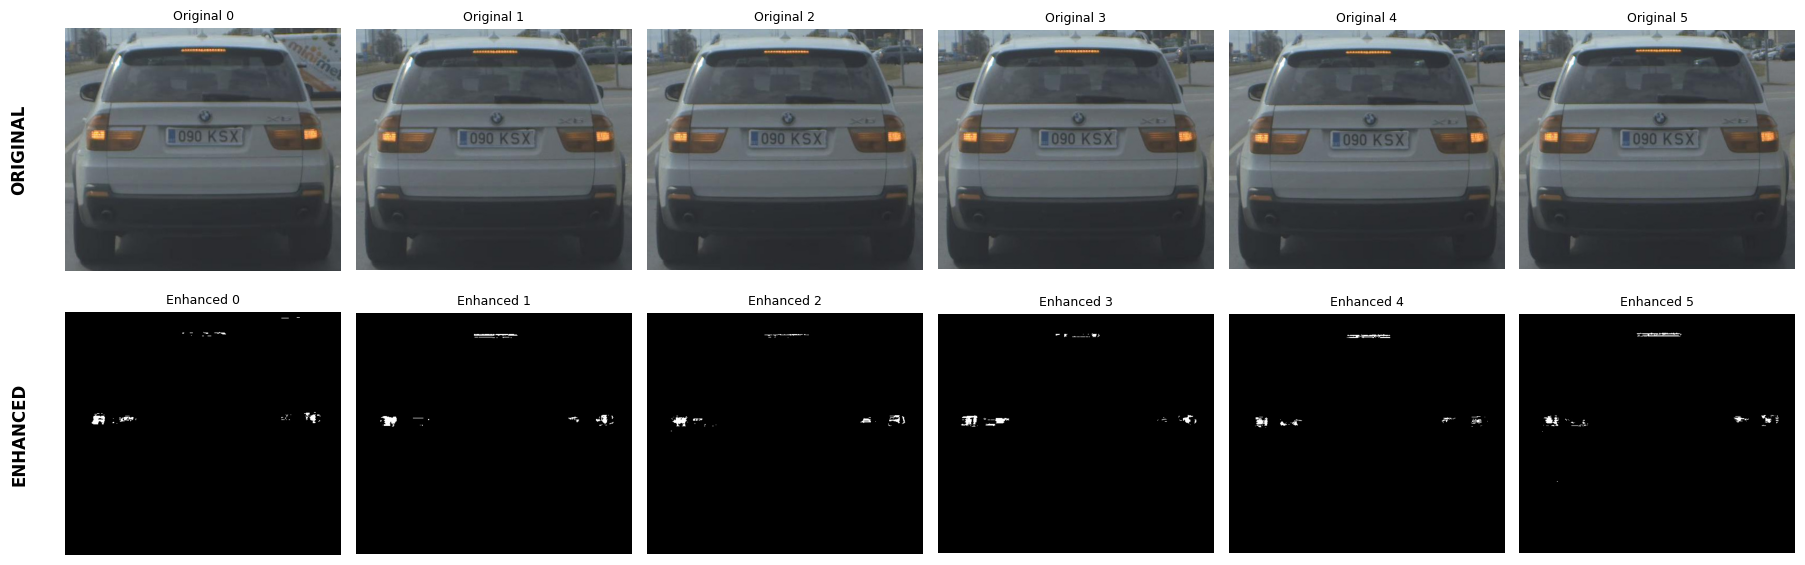

In [33]:
fig, axes = plt.subplots(2, 6, figsize=(18, 6))
for i in range(6):
    # Original
    axes[0, i].imshow(Image.open(orig_paths[i]))
    axes[0, i].set_title(f'Original {i}', fontsize=9)
    axes[0, i].axis('off')
    
    # Enhanced
    axes[1, i].imshow(Image.open(enhanced_paths[i]))
    axes[1, i].set_title(f'Enhanced {i}', fontsize=9)
    axes[1, i].axis('off')

axes[0, 0].text(-0.2, 0.5, 'ORIGINAL', transform=axes[0, 0].transAxes,
               fontsize=12, fontweight='bold', va='center', rotation=90)
axes[1, 0].text(-0.2, 0.5, 'ENHANCED', transform=axes[1, 0].transAxes,
               fontsize=12, fontweight='bold', va='center', rotation=90)
plt.tight_layout()
plt.show()

## OpenAI API

In [2]:
results_df = process_all_sequences(
    label_csv='../labels_output/enhanced_labels_lstm.csv',  # Use enhanced label CSV
    method='individual',
    model='gpt-4o-mini',
    output_path='openai_results_yellow.json',
    image_base_path='',  # Empty because paths in CSV are already full
    preprocess='yellow'  # Images are already preprocessed
)

Processing 21 sequences using method: individual
Model: gpt-4o-mini
Image base path: 
Preprocessing: yellow
------------------------------------------------------------

[1/21] Processing seq_0000...
  True label: right
  Frames: 13
  First frame: 142120.jpg
  Running individual frames method (preprocess=yellow)...

[2/21] Processing seq_0001...
  True label: left
  Frames: 13
  First frame: 087883.jpg
  Running individual frames method (preprocess=yellow)...

[3/21] Processing seq_0002...
  True label: left
  Frames: 13
  First frame: 0510122.jpg
  Running individual frames method (preprocess=yellow)...

[4/21] Processing seq_0003...
  True label: right
  Frames: 11
  First frame: 0017802.jpg
  Running individual frames method (preprocess=yellow)...

[5/21] Processing seq_0004...
  True label: right
  Frames: 13
  First frame: 074251.jpg
  Running individual frames method (preprocess=yellow)...

[6/21] Processing seq_0005...
  True label: left
  Frames: 13
  First frame: 065991.jpg
  

In [3]:
metrics = evaluate_results(results_df)

Individual Frames Method:
  Accuracy: 23.81% (5/21)
  Confusion Matrix:
individual  left
true_label      
hazard         1
left           5
none          10
right          5



Summary saved to results_enhanced_summary.png


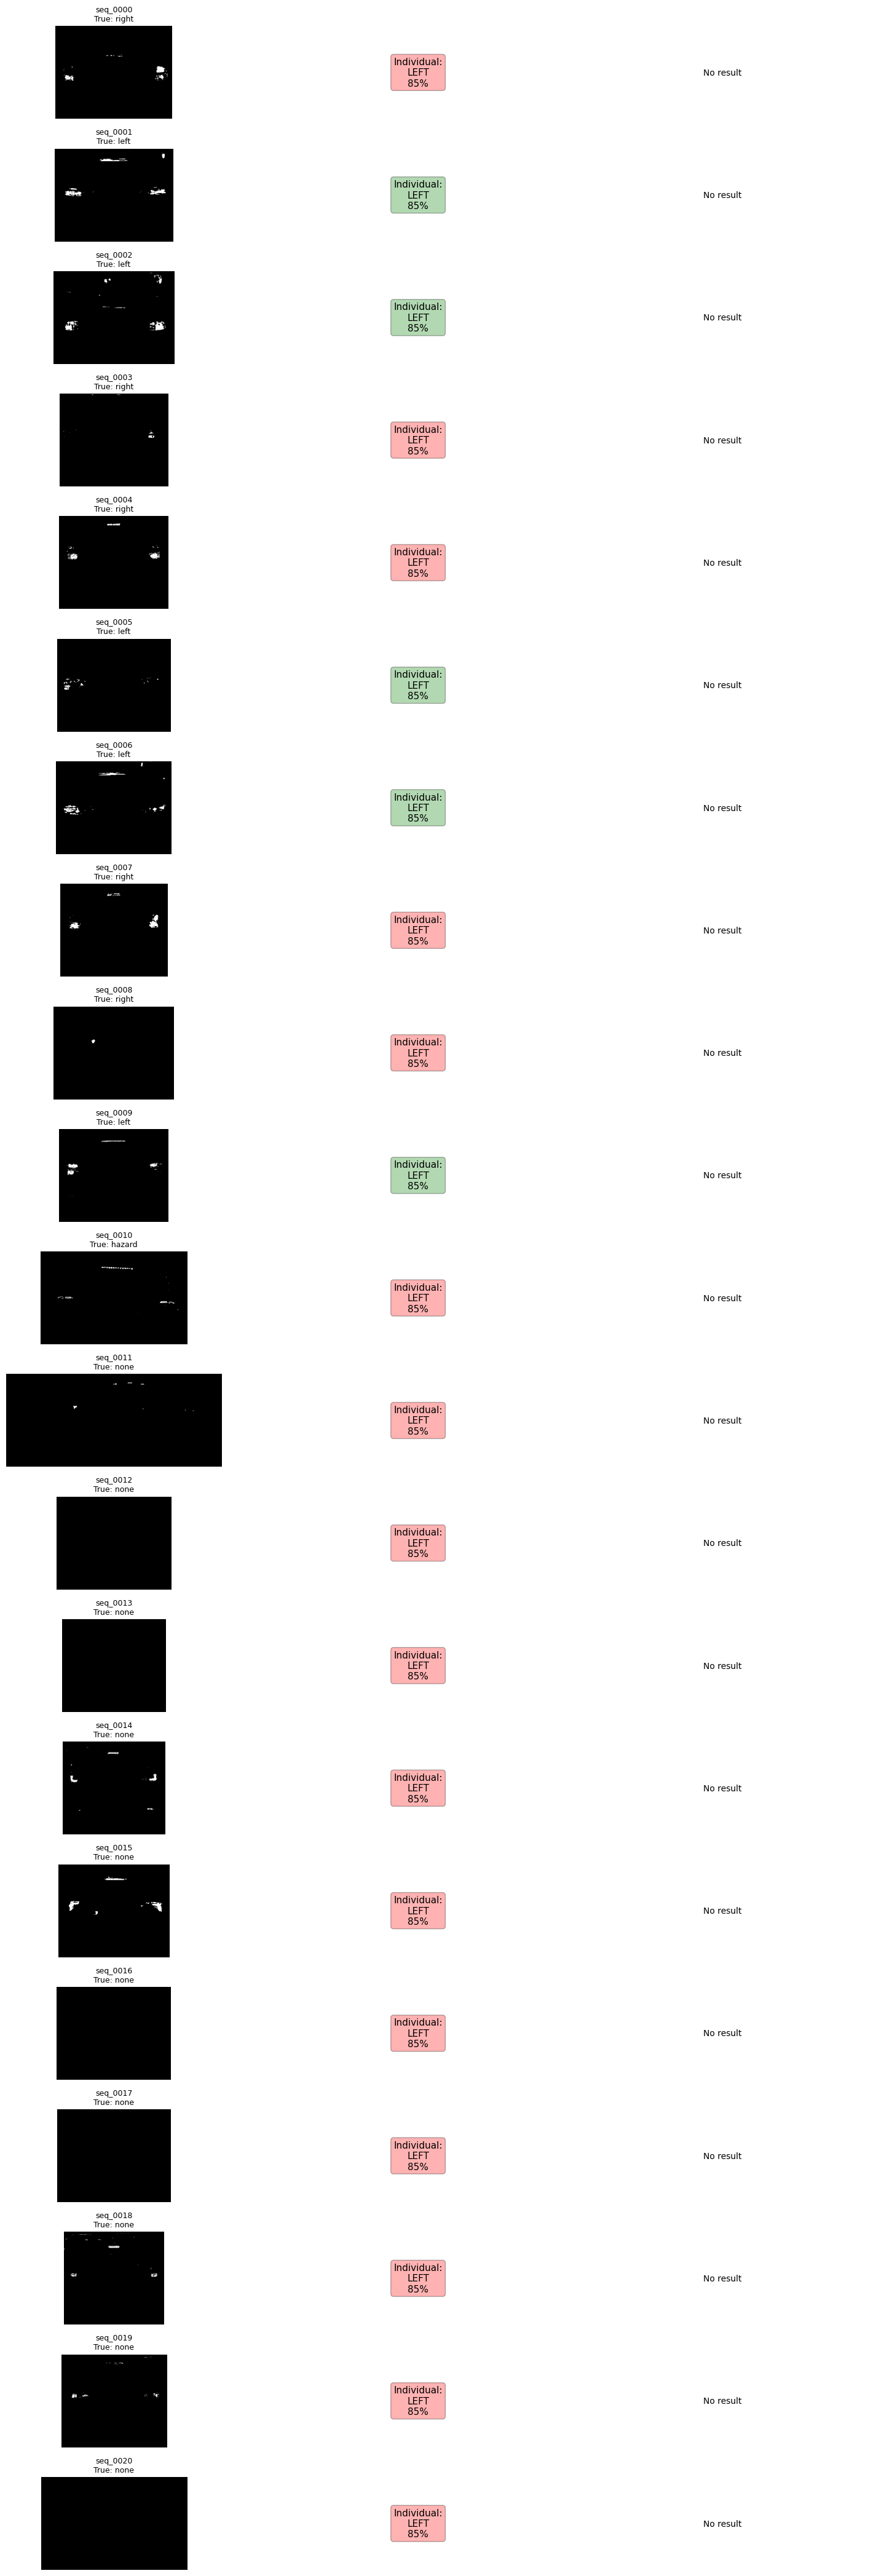

In [4]:
fig = visualize_all_sequences_summary(results_df, output_path='results_enhanced_summary.png')
plt.show()